In [1]:
import numpy as np
import neural_net
import scipy.stats
import matplotlib.pyplot as plt

# European options

Let's see how a neural network can approximate the price of a European call option. In the definition of "call" function, we normalize all prices with the current asset price.
In addition, we absorb the time scale in the definition of "r" and "vol". In other words, we set T=1.

In [2]:
def call(K, vol, r):
    S = 1.0
    T = 1.0
    d1 = (np.log(S/K) + (r + vol**2/2)*T)/(vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return -K*np.exp(-r*T)*scipy.stats.norm.cdf(d2) + S*scipy.stats.norm.cdf(d1)
Kmin, Kmax = 0.5, 2.0
volmin, volmax = 0.05, 0.4
rmin, rmax = 0.0, 0.3
Tmin, Tmax = 0.1, 5.0
min_param = [Kmin, volmin*np.sqrt(Tmin), rmin*Tmin]
max_param = [Kmax, volmax*np.sqrt(Tmax), rmax*Tmax]

f = neural_net.Fn(min_param, max_param, call)

In [13]:
training, validation, test = neural_net.load_data(10000,5000,5000,f)

# Training nets

Epoch 2003 training complete. learning_halve = 6
Epoch 4320 training complete. learning_halve = 6
Epoch 6574 training complete. learning_halve = 3
Epoch 8829 training complete. learning_halve = 2
Epoch 11032 training complete. learning_halve = 2
Epoch 13325 training complete. learning_halve = 1
Epoch 15637 training complete. learning_halve = 1
Learning stopped early
total learning time = 7.6 minutes


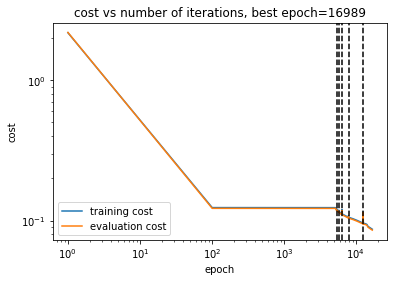

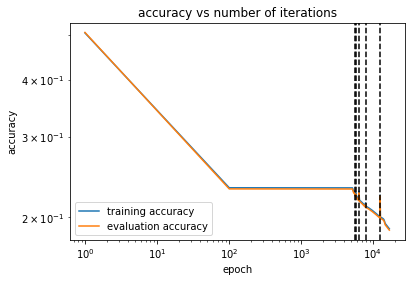

In [28]:
size = [3,20,10,1]
monitor, show_plot = True, True
activation_type = ["Sigmoid", "Sigmoid", "Sigmoid"]
net = neural_net.Network(size, activations=activation_type, Fn=f)
eta = 1.0
batch_size = 10000
net.SGD(training, batch_size, eta, epochs=10000, mu=0.0, 
        variable_learning=True, evaluation_data=validation, no_improvement_size=100, learning_halve=6,
        monitor_training_cost=monitor, monitor_evaluation_cost=monitor,
        monitor_training_accuracy=monitor, monitor_evaluation_accuracy=monitor,show_plot=show_plot)

In [74]:
monitor, show_plot = False, False
eta = 1.0
batch_size = 100
net.SGD(training, batch_size, eta, mu=0.0, 
        variable_learning=True, evaluation_data=validation, no_improvement_size=100, learning_halve=10,
        monitor_training_cost=monitor, monitor_evaluation_cost=monitor,
        monitor_training_accuracy=monitor, monitor_evaluation_accuracy=monitor,show_plot=show_plot)

Epoch 1199 training complete. learning_halve = 5
Epoch 2803 training complete. learning_halve = 5
Learning stopped early
total learning time = 2.7 minutes


In [76]:
print(net.accuracy(test), net.accuracy(test, flag="Max"))

0.024021633195614976 0.080808348352575


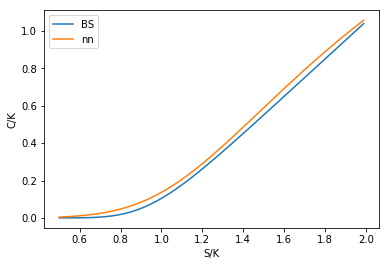

In [82]:
s = np.arange(0.5,2.0,0.01)
s = s.reshape((len(s),1))
K = 1.0
k = K/s
t = 1.0
sigma = 0.2
vol = np.ones(k.shape)*sigma*np.sqrt(t)
interest_rate = 0.05
r = np.ones(k.shape)*interest_rate*t
c = s*call(k, vol, r)
cnet = s*net.feedforward(np.hstack((k, vol, r)))
plt.plot(s, c, label="BS")
plt.plot(s, cnet, label="nn")
plt.xlabel("S/K")
plt.ylabel("C/K")
plt.legend()

In [81]:
net.save("trained_nets_call/ex1")

Epoch 814 training complete. learning_halve = 5
Epoch 1642 training complete. learning_halve = 4
Epoch 2555 training complete. learning_halve = 4
Epoch 3720 training complete. learning_halve = 4
Learning stopped early
total learning time = 4.5 minutes


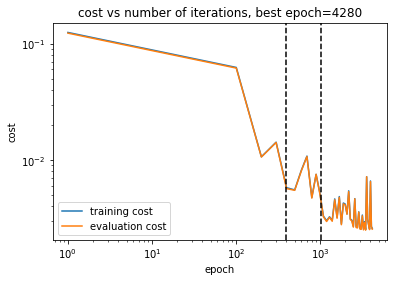

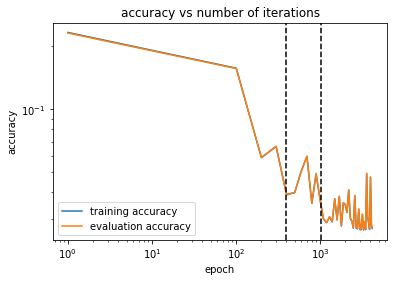

In [58]:
size = [3,20,20,10,1]
monitor, show_plot = True, True
net2 = neural_net.Network(size, Fn=f)
eta = 1.0
batch_size = 100
net2.SGD(training, batch_size, eta, epochs=10000, mu=0.0, 
        variable_learning=True, evaluation_data=validation, no_improvement_size=100, learning_halve=6,
        monitor_training_cost=monitor, monitor_evaluation_cost=monitor,
        monitor_training_accuracy=monitor, monitor_evaluation_accuracy=monitor,show_plot=show_plot)

In [68]:
monitor, show_plot = False, False
eta = 1.0
batch_size = 100
net2.SGD(training, batch_size, eta, mu=0.0, 
        variable_learning=True, evaluation_data=validation, no_improvement_size=100, learning_halve=10,
        monitor_training_cost=monitor, monitor_evaluation_cost=monitor,
        monitor_training_accuracy=monitor, monitor_evaluation_accuracy=monitor,show_plot=show_plot)

Epoch 1184 training complete. learning_halve = 6
Epoch 2356 training complete. learning_halve = 6
Epoch 3193 training complete. learning_halve = 6
Epoch 4017 training complete. learning_halve = 6
Learning stopped early
total learning time = 5.0 minutes


In [69]:
print(net2.accuracy(test), net2.accuracy(test, flag="Max"))

0.024767675967287583 0.09305611761830945


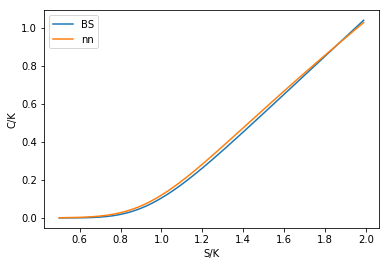

In [79]:
s = np.arange(0.5,2.0,0.01)
s = s.reshape((len(s),1))
K = 1.0
k = K/s
sigma = 0.2
t = 1.0
vol = np.ones(k.shape)*sigma*np.sqrt(t)
interest_rate = 0.05
r = np.ones(k.shape)*interest_rate*t
c = s*call(k, vol, r)
cnet = s*net2.feedforward(np.hstack((k, vol, r)))
plt.plot(s, c, label="BS")
plt.plot(s, cnet, label="nn")
plt.xlabel("S/K")
plt.ylabel("C/K")
plt.legend()

In [67]:
net2.save("trained_nets_call/ex2")

# Trained nets

In [85]:
net1 = neural_net.load("trained_nets_call/ex1")
net2 = neural_net.load("trained_nets_call/ex2")
print(net1.sizes, net2.sizes)
print(net1.accuracy(test), net2.accuracy(test))

[3, 20, 10, 1] [3, 20, 20, 10, 1]
0.024021633195614976 0.024899638048014185


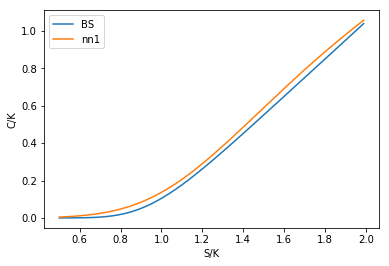

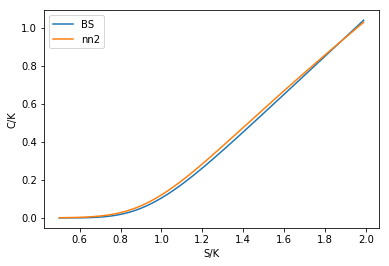

In [94]:
s = np.arange(0.5,2.0,0.01)
s = s.reshape((len(s),1))
K = 1.0
k = K/s
sigma = 0.2
t = 1.0
vol = np.ones(k.shape)*sigma*np.sqrt(t)
interest_rate = 0.05
r = np.ones(k.shape)*interest_rate*t
c = s*call(k, vol, r)
cnet1 = s*net1.feedforward(np.hstack((k, vol, r)))
cnet2 = s*net2.feedforward(np.hstack((k, vol, r)))

plt.figure()
plt.plot(s, c, label="BS")
plt.plot(s, cnet1, label="nn1")
plt.xlabel("S/K")
plt.ylabel("C/K")
plt.legend()

plt.figure()
plt.plot(s, c, label="BS")
plt.plot(s, cnet2, label="nn2")
plt.xlabel("S/K")
plt.ylabel("C/K")
plt.legend()